In [40]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


data = pd.read_csv('agricultural_yield.csv')
data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [5]:
x = data[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule']]
y = data['Yield_kg_per_hectare'].values


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
model = Sequential([
      Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
      Dense(32, activation='relu'),
      Dense(1)
])

In [28]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [29]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2, verbose = 1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 533617.5625 - mae: 702.1204 - val_loss: 557053.5625 - val_mae: 719.8265
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 506821.7812 - mae: 684.9210 - val_loss: 498445.8125 - val_mae: 679.8435
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 429078.8750 - mae: 626.4984 - val_loss: 359962.2812 - val_mae: 576.5766
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 296337.4062 - mae: 521.1748 - val_loss: 177113.5000 - val_mae: 402.1632
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 132647.2031 - mae: 343.2271 - val_loss: 50346.5195 - val_mae: 205.4276
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35922.8750 - mae: 167.4217 - val_loss: 14909.1904 - val_mae: 100.9881
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12894.7812 - mae: 91.7682 - val_loss: 10187.5723 - val_mae: 80.1733
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10276.6396 - mae: 81.5254 - val_loss: 

In [33]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose = 1)
print(f"Test Mean Absolute Error : {test_mae : .2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2681.5679 - mae: 42.2598
Test Mean Absolute Error :  40.29


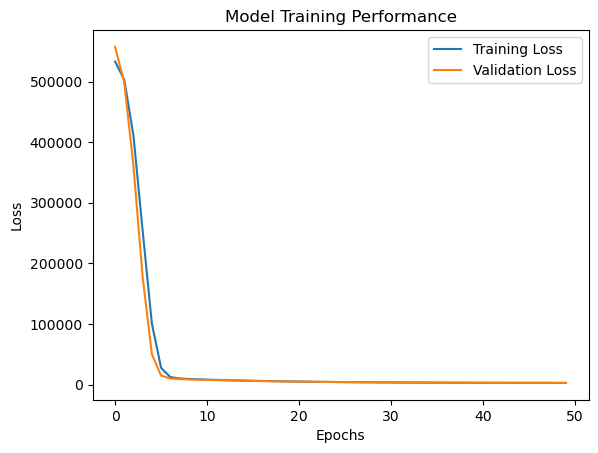

In [36]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_15200\3542362800.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_15200\3542362800.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yie

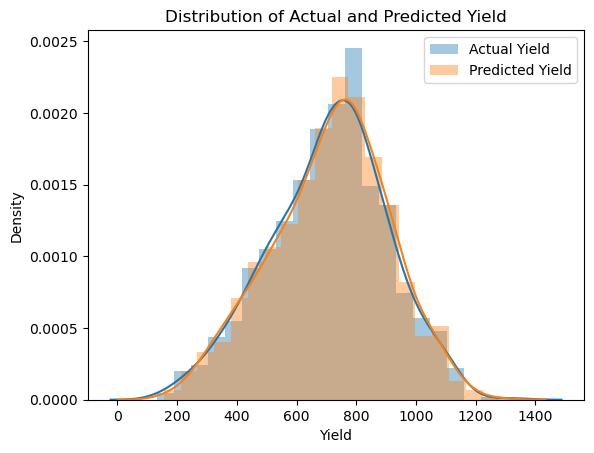

In [41]:
# Distribution plots
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [37]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,685 (30.02 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,124 (20.02 KB)

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=16)

In [32]:
y_pred = model.predict(X_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


array([[ 454.22296],
       [ 665.66504],
       [1076.3262 ],
       [ 678.2761 ],
       [ 821.41284],
       [1001.8332 ],
       [ 302.6587 ],
       [ 597.0349 ],
       [ 455.31134],
       [ 818.61426],
       [ 598.52905],
       [ 691.511  ],
       [ 637.75183],
       [ 753.5304 ],
       [ 865.7412 ],
       [ 696.12726],
       [ 967.16565],
       [ 469.28598],
       [ 585.5956 ],
       [ 362.29022],
       [ 816.66797],
       [ 817.351  ],
       [ 367.3327 ],
       [ 830.493  ],
       [1015.5424 ],
       [ 599.98206],
       [ 667.8535 ],
       [ 975.1689 ],
       [ 632.97845],
       [ 638.5373 ],
       [ 695.6537 ],
       [ 823.414  ],
       [ 833.3326 ],
       [ 784.7183 ],
       [ 504.0119 ],
       [ 722.2687 ],
       [ 736.0728 ],
       [1021.57544],
       [ 186.03488],
       [ 661.62067],
       [ 935.45825],
       [ 898.8772 ],
       [ 797.55304],
       [ 756.2856 ],
       [ 616.7105 ],
       [ 848.95056],
       [ 622.62115],
       [ 584.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


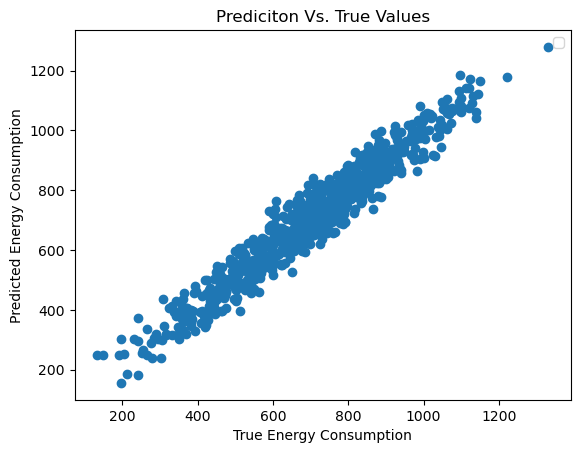

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Prediciton Vs. True Values')
plt.legend()
plt.show()